In [ ]:
import yfinance as yf

In [ ]:
!pip install yfinance pandas matplotlib numpy

In [ ]:
import yfinance as yf
import pandas as pd

# Define the stock symbols and the period of interest
symbols = ['AAPL', 'MSFT', 'GOOGL']  # Add more symbols as needed
start_date = '2010-01-01'
end_date = '2023-01-01'

# Download stock data
data = {}
for symbol in symbols:
    df = yf.download(symbol, start=start_date, end=end_date)
    data[symbol] = df['Adj Close']

# Combine data into a single DataFrame
stock_data = pd.DataFrame(data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    return excess_returns.mean() / excess_returns.std()

def calculate_sortino_ratio(returns, risk_free_rate=0.0):
    excess_returns = returns - risk_free_rate
    downside_returns = excess_returns[excess_returns < 0]
    return excess_returns.mean() / downside_returns.std()

def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_calmar_ratio(returns):
    annualized_return = returns.mean() * 252
    max_drawdown = calculate_max_drawdown(returns)
    return annualized_return / abs(max_drawdown)

# Calculate daily returns
daily_returns = stock_data.pct_change().dropna()

# Calculate risk-adjusted metrics
metrics = pd.DataFrame(index=daily_returns.columns)
metrics['Sharpe Ratio'] = daily_returns.apply(calculate_sharpe_ratio)
metrics['Sortino Ratio'] = daily_returns.apply(calculate_sortino_ratio)
metrics['Max Drawdown Ratio'] = daily_returns.apply(calculate_max_drawdown)
metrics['Calmar Ratio'] = daily_returns.apply(calculate_calmar_ratio)


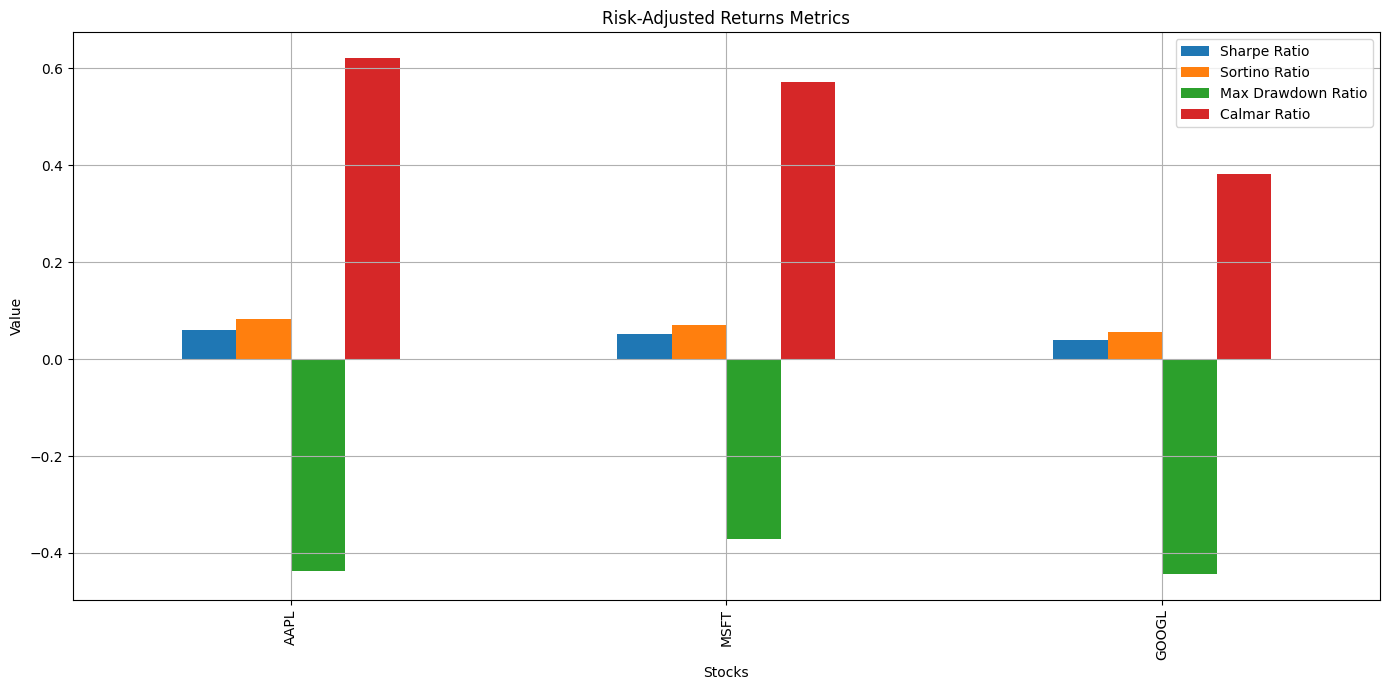

In [ ]:
import matplotlib.pyplot as plt

# Plot metrics
metrics.plot(kind='bar', figsize=(14, 7))
plt.title('Risk-Adjusted Returns Metrics')
plt.xlabel('Stocks')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Risk-Adjusted Returns Metrics:")
print(metrics)

# Analyze each metric
for symbol in metrics.index:
    print(f"\n{symbol}:")
    print(f"  Sharpe Ratio: {metrics.loc[symbol, 'Sharpe Ratio']:.2f}")
    print(f"  Sortino Ratio: {metrics.loc[symbol, 'Sortino Ratio']:.2f}")
    print(f"  Max Drawdown Ratio: {metrics.loc[symbol, 'Max Drawdown Ratio']:.2f}")
    print(f"  Calmar Ratio: {metrics.loc[symbol, 'Calmar Ratio']:.2f}")


Risk-Adjusted Returns Metrics:
       Sharpe Ratio  Sortino Ratio  Max Drawdown Ratio  Calmar Ratio
AAPL       0.059653       0.083097           -0.437972      0.620884
MSFT       0.051426       0.071210           -0.371485      0.571228
GOOGL      0.039495       0.054909           -0.443201      0.382411

AAPL:
  Sharpe Ratio: 0.06
  Sortino Ratio: 0.08
  Max Drawdown Ratio: -0.44
  Calmar Ratio: 0.62

MSFT:
  Sharpe Ratio: 0.05
  Sortino Ratio: 0.07
  Max Drawdown Ratio: -0.37
  Calmar Ratio: 0.57

GOOGL:
  Sharpe Ratio: 0.04
  Sortino Ratio: 0.05
  Max Drawdown Ratio: -0.44
  Calmar Ratio: 0.38


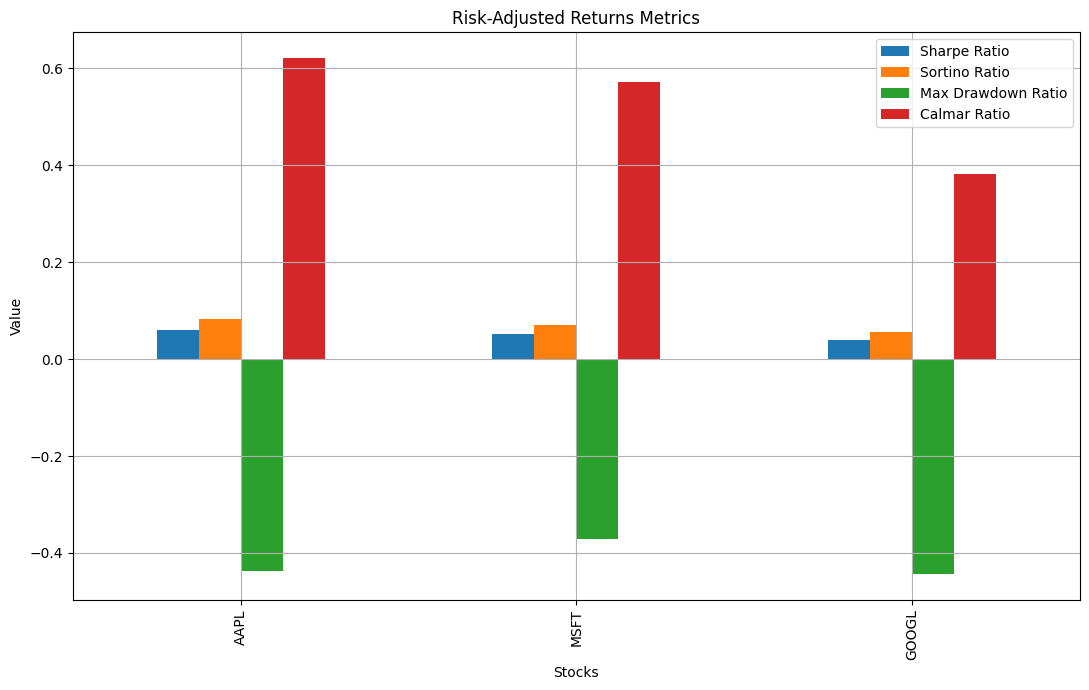

In [ ]:
import matplotlib.pyplot as plt

# Plot metrics
metrics.plot(kind='bar', figsize=(11, 7))
plt.title('Risk-Adjusted Returns Metrics')
plt.xlabel('Stocks')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()